In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib import cm
import sympy as sym
import random as rand
import Data

import Functions_module_beta as fn
from Functions_module_beta import MatrixAction, SystemAction
import custom_functions_01 as cfn
from custom_functions_01 import avg_prob_with_confidence
from mpl_toolkits.mplot3d import Axes3D

In [2]:
avg_prob_with_confidence(index_729=200, theta= 45 , confidence = 1, machine_uncertainty=.000000001) # test

0.499998895236

In [13]:

confidence_threshold_list = np.linspace(1, 0, 80)  # Adjust the range and number of points as needed
angle_list = np.linspace(0, 45, 60)  # Adjust the range and number of points as needed
X, Y = np.meshgrid(angle_list,confidence_threshold_list)

In [14]:
# For the next 3D plot involving concurrence instead of angle
concurrence_list = np.sin(2*((np.pi/180)*(angle_list))) # converting to radians and doing sin(2theta) for concurrence

X_1, Y_1 = np.meshgrid(concurrence_list,confidence_threshold_list)     # new meshgrid for the plot`


In [15]:

avg_prob_array = np.array([[avg_prob_with_confidence(index_729=200, theta= i , confidence = j , machine_uncertainty=.000000001) for i in angle_list ] for j in confidence_threshold_list])
# b = [ i**2 for i in angle_list]
# c = [ i for i in angle_list]


Z = avg_prob_array

Z.shape

(80, 60)

In [7]:
# concurrence_list

array([0.        , 0.04618346, 0.09226836, 0.13815635, 0.18374952,
       0.22895055, 0.27366299, 0.31779142, 0.36124167, 0.403921  ,
       0.44573836, 0.48660448, 0.52643216, 0.56513641, 0.60263464,
       0.63884681, 0.67369564, 0.70710678, 0.73900892, 0.76933397,
       0.79801723, 0.82499747, 0.85021714, 0.87362239, 0.89516329,
       0.91479387, 0.93247223, 0.94816065, 0.96182564, 0.97343805,
       0.9829731 , 0.99041043, 0.99573418, 0.99893297, 1.        ])

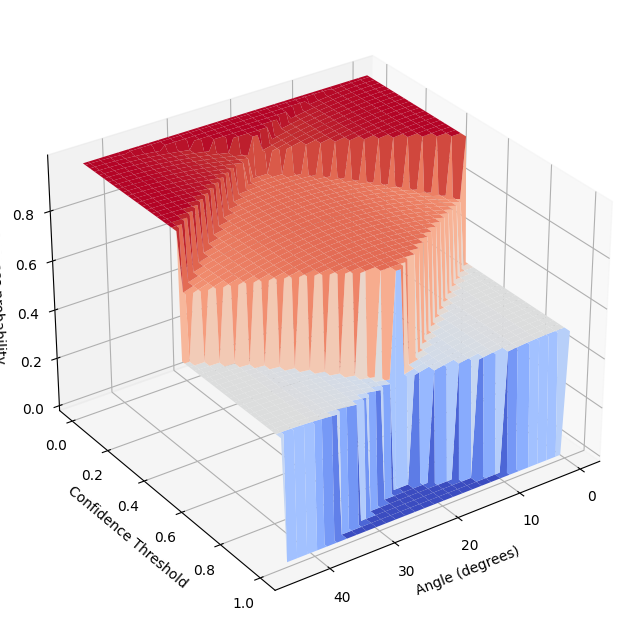

In [18]:
# Working
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_surface(X_1, Y_1, Z, cmap='coolwarm')       # concurrence, uncomment to use and comment out the angle one below
# ax.set_xlabel('Concurrence')

ax.plot_surface(X, Y, Z, cmap='coolwarm')     # angle, uncomment to use and comment out the concurrence one above
ax.set_xlabel('Angle (degrees)')

ax.set_ylabel('Confidence Threshold')
ax.set_zlabel('Avg. success probability')
ax.view_init(elev = 30, azim=55)
fig.set_size_inches(8,8)
plt.show()

This plot is actually smooth despite the apparent stripes on the confidence threshold axis. It is because we have taken intervals of 0.01 and if we make it further refined, we will get a more continuous/smoother graph. And if we decrease this, let's say for example 0.1 , in that case we will have more grainy/ pixelated graph plot. So ideally speaking, it should be a very continuous graph everywhere (except the singularities at each confidence threshold point).